#**Introducción**


El presente análisis tiene como objetivo evaluar el desempeño financiero y comercial de cuatro tiendas pertenecientes a la empresa, con el fin de determinar cuál de ellas debería ser vendida por el Sr. Juan.

Para ello, se analizaron los siguientes indicadores clave:
*   Ingreso total por tienda.
*   Ventas por categoría de productos.
*   Calificación promedio otorgada por los clientes.
*   Productos más y menos vendidos.
*   Costo de envío promedio.

A partir de estos factores se realizó una evaluación comparativa integral, considerando tanto la rentabilidad como la eficiencia operativa y la satisfacción del cliente.

#**Desarrollo del análisis**

## 1.  Importación de datos y data cleaning




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.0f}'.format

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Concatenamos los 4 DataFrames en uno solo para facilitar el analisis comparativo entre tiendas, para ello, creamos una columna "tienda" usando un ciclo for, el cual itera en la lista 'tiendas' y asigna un identificador correspondiente a cada conjunto de datos.

In [ ]:
# Creamos una lista con los DataFrames de cada tienda
tiendas = [tienda, tienda2, tienda3, tienda4]

# Recorremos cada DataFrame y agregamos una columna identificadora
for i, df_temp in enumerate(tiendas, start=1):
    df_temp['tienda'] = f'Tienda {i}'

#Concatenamos los 4 DataFrames
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
3168,Smartwatch,Electrónicos,"203,000","9,000",23/11/2021,Juan Fernandez,Medellín,4,Tarjeta de crédito,8,6,-76,Tienda 2
4939,Olla de presión,Artículos para el hogar,"76,900","4,600",11/06/2022,Beatriz Morales,Bogotá,5,Tarjeta de crédito,1,5,-74,Tienda 3
1731,Lavavajillas,Electrodomésticos,"1,181,000","63,100",02/02/2020,Izabela de León,Bogotá,1,Tarjeta de crédito,3,5,-74,Tienda 1
1863,Impresora,Electrónicos,"266,400","12,400",27/03/2022,Felipe Santos,Medellín,5,Tarjeta de crédito,1,6,-76,Tienda 1
4667,Vaso térmico,Deportes y diversión,"22,600",0,27/10/2021,Ángel Rodriguez,Bogotá,3,Cupón,1,5,-74,Tienda 2
2891,Iphone 15,Electrónicos,"2,009,000","110,300",14/05/2022,Mariana Herrera,Medellín,5,Tarjeta de crédito,1,6,-76,Tienda 2
8398,Modelado predictivo,Libros,"63,400","3,900",20/01/2020,Camila Rivera,Bogotá,3,Tarjeta de crédito,1,5,-74,Tienda 4
4282,Vaso térmico,Deportes y diversión,"46,300","7,100",23/08/2020,Ángel Rodriguez,Medellín,3,Tarjeta de crédito,5,6,-76,Tienda 2
4591,Balón de voleibol,Deportes y diversión,"55,100","3,400",23/01/2021,Blanca Ramirez,Medellín,2,Tarjeta de crédito,10,6,-76,Tienda 2
690,Cama king,Muebles,"773,700","39,400",08/04/2020,Maria Alfonso,Bogotá,5,Nequi,1,5,-74,Tienda 1


In [ ]:
#Inspeccionamos la estructura general del DataFrame, verificando el número de registros, los tipos de datos de cada variable y la presencia de valores nulos.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


##2. Análisis de facturación



2.1. Se calculó el ingreso total por tienda mediante la agregación (suma) de la columna `Precio`, utilizando `groupby()` para segmentar por la variable `tienda`.

2.2. Realizamos una grafica para visualizar mejor los resultados.


In [ ]:
df.groupby('tienda')['Precio'].sum()

,Precio
tienda,
Tienda 1,"1,150,880,400"
Tienda 2,"1,116,343,500"
Tienda 3,"1,098,019,600"
Tienda 4,"1,038,375,700"


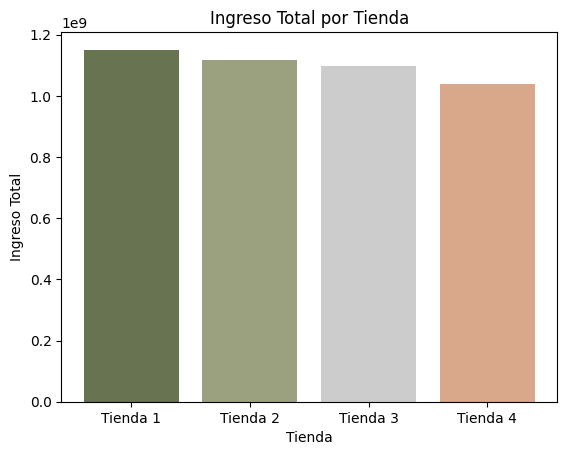

In [ ]:
ingresos = df.groupby("tienda")["Precio"].sum()
plt.figure()
plt.bar(ingresos.index, ingresos.values, color=["#687351", "#9BA17F", "#cccccc", "#d9a789"])
plt.title("Ingreso Total por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total")

plt.show()

El análisis de ingresos mostró que:
* Tienda 1 presenta el mayor volumen de ingresos.
* Le siguen Tienda 2 y Tienda 3 con valores similares.
* Tienda 4 registra el menor ingreso total.

Esto indica que, desde una perspectiva estrictamente financiera, la Tienda 1 es la más rentable en términos absolutos.

## 3. Ventas por categoría

Agrupamos los datos por tienda y categoría del producto y contamos la cantidad de ventas por cada combinación. Luego usamos .unstack() para transformar el índice jerárquico en una tabla donde las filas representan tiendas y las columnas categorías.

In [ ]:
ventas_categoria = df.groupby(["tienda", "Categoría del Producto"]).size().unstack()
ventas_categoria


Categoría del Producto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
tienda,,,,,,,,
Tienda 1,171,284,312,448,182,324,173,465
Tienda 2,181,275,305,422,224,313,197,442
Tienda 3,177,277,278,451,177,315,185,499
Tienda 4,201,277,254,451,170,338,187,480


Para facilitar la visualizacion y jerarquia de las categorías más populares de cada tienda generamos un gráfico.

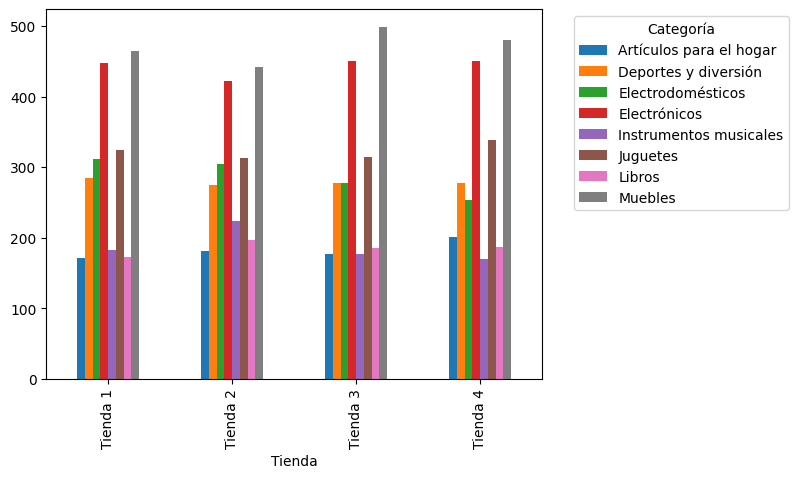

In [ ]:
ventas_categoria.plot(kind="bar", xlabel='Tienda')

#Para que la leyenda este fuera del grafico, asi observamos completa la información.
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc="upper left")


Se observa que la categoria más popular en todas las tiendas son los muebles, seguida por los electronicos y juguetes.

Mientras que, las categorias menos populares son los instrumentos musicales, los articulos del hogar y los libros.




## 4. Calificación promedio de la tienda


In [ ]:
#Al inicio configuramos el formato para que eliminara los decimales para todo el entorno,
#pero para este caso son importantes, por lo tanto quitamos esta configuración.
pd.reset_option("display.float_format")

df.groupby("tienda")["Calificación"].mean().round(2)


,Calificación
tienda,
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


Las calificaciones promedio obtenidas fueron cercanas entre sí, con ligeras variaciones:

* Tienda 3 presenta la mayor valoración promedio.
* Tienda 1 muestra la valoración más baja.

Si bien las diferencias no son drásticas, la satisfacción del cliente es un factor clave para la sostenibilidad del negocio a largo plazo.

## 5. Productos más y menos vendidos

Se agruparon los datos por tienda y producto utilizando groupby() y value_counts() para calcular la frecuencia de ventas. Posteriormente, se seleccionaron los tres productos con mayor y menor número de ventas por tienda. Finalmente, se utilizó unstack() para transformar el índice jerárquico en un formato tabular adecuado para visualización.



In [ ]:
productos_mas_vendidos = df.groupby("tienda")["Producto"].value_counts().groupby(level=0).head(3)
top_5 = productos_mas_vendidos.unstack()

productos_menos_vendidos = df.groupby("tienda")["Producto"].value_counts().groupby(level=0).tail(3)
low_5 = productos_menos_vendidos.unstack()

In [ ]:
productos_mas_vendidos

tienda    Producto                 
Tienda 1  Armario                      60
          Microondas                   60
          TV LED UHD 4K                60
Tienda 2  Iniciando en programación    65
          Microondas                   62
          Batería                      61
Tienda 3  Kit de bancas                57
          Cama king                    56
          Mesa de comedor              56
Tienda 4  Cama box                     62
          Cubertería                   59
          Cama king                    56
Name: count, dtype: int64

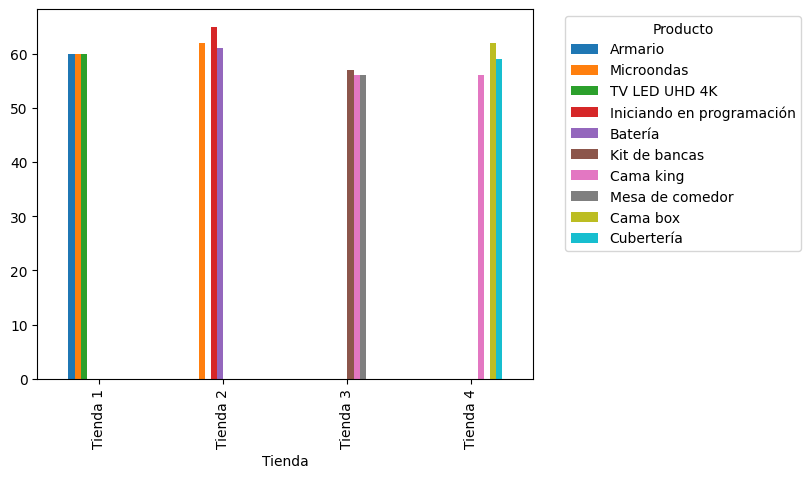

In [ ]:
top_5.plot(kind="bar", xlabel="Tienda")

#Para que la leyenda este fuera del grafico, asi observamos completa la información.
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc="upper left")

In [ ]:
productos_menos_vendidos

tienda    Producto                 
Tienda 1  Olla de presión              35
          Auriculares con micrófono    33
          Celular ABXY                 33
Tienda 2  Impresora                    34
          Mesa de comedor              34
          Juego de mesa                32
Tienda 3  Mochila                      36
          Set de vasos                 36
          Bloques de construcción      35
Tienda 4  Guitarra acústica            37
          Armario                      34
          Guitarra eléctrica           33
Name: count, dtype: int64

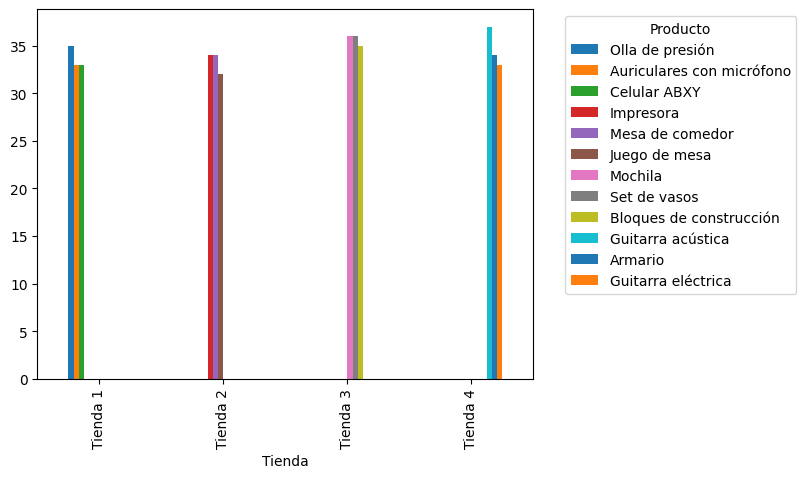

In [ ]:
low_5.plot(kind="bar", xlabel="Tienda")
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc="upper left")

Los resultados muestran que los productos más vendidos no son necesariamente los mismos en todas las tiendas, lo que sugiere diferencias en el comportamiento del consumidor según la ubicación o el perfil del mercado atendido por cada una.

En cuanto a los productos menos vendidos, estos varían entre tiendas y podrían representar:

* Baja demanda local.
* Problemas de estrategia comercial.
* Falta de promoción.
* Posible ineficiencia en la gestión del inventario.

El hecho de que los productos destacados (tanto los más como los menos vendidos) cambien entre tiendas indica que cada establecimiento tiene una dinámica comercial propia, lo cual es un factor relevante al momento de evaluar su desempeño individual.

## 6. Envío promedio por tienda

In [ ]:
df.groupby("tienda")["Costo de envío"].mean()

,Costo de envío
tienda,
Tienda 1,"26,019"
Tienda 2,"25,216"
Tienda 3,"24,806"
Tienda 4,"23,459"


El costo de envío promedio también varía entre tiendas:

* Una tienda con costos de envío elevados puede afectar la competitividad.
* Costos más bajos pueden representar una ventaja logística y comercial.

Este factor impacta directamente en la rentabilidad y en la experiencia del cliente.

#**Conclusión**

La Tienda 4 presenta el menor ingreso total en comparación con las demás y evidencia una tendencia menos competitiva en volumen de ventas. Si bien sus productos más vendidos varían respecto a las otras tiendas (lo que demuestra dinámicas comerciales propias), su impacto en la rentabilidad global del negocio es menor frente al aporte generado por las demás sucursales.

Considerando estos factores, se recomienda al Sr. Juan que, en caso de decidir vender una tienda, la Tienda 4 sería la opción que generaría el menor impacto financiero en el conjunto de sus operaciones o, alternativamente, hacer una reestructuración focalizada que optimice su rentabilidad y competitividad.